# SUPPORT VECTOR MACHINE

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv("/content/heart.csv")

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df.shape

(1025, 14)

Text(0, 0.5, 'Chest pain')

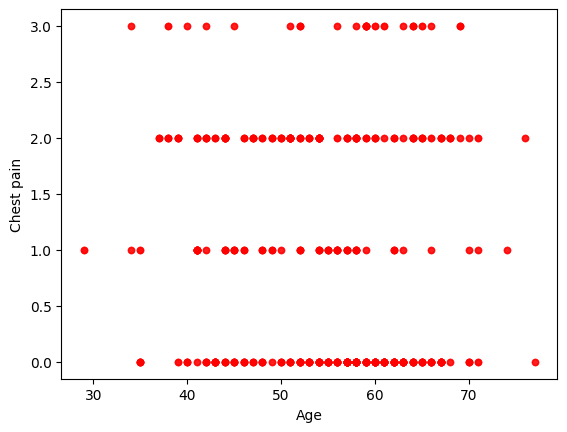

In [ ]:
df.plot(kind='scatter',x='age',y='cp',alpha=0.5,color='red')
plt.xlabel('Age')
plt.ylabel('Chest pain')

Text(0, 0.5, 'Cholestrol')

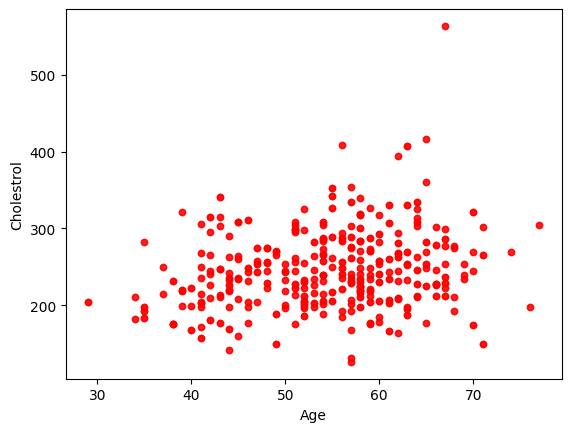

In [ ]:
df.plot(kind='scatter',x='age',y='chol',alpha=0.5,color='red')
plt.xlabel('Age')
plt.ylabel('Cholestrol')

Text(0, 0.5, 'Cholestrol')

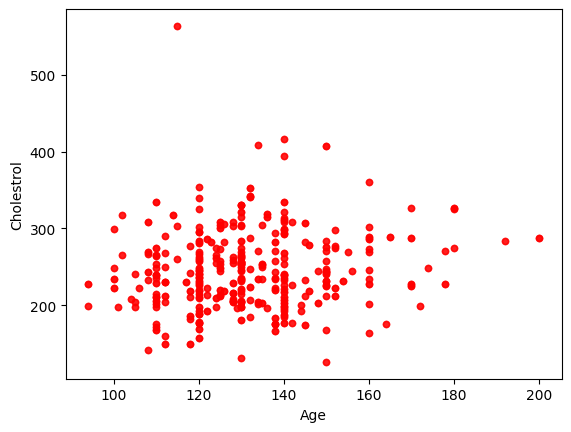

In [ ]:
df.plot(kind='scatter',x='trestbps',y='chol',alpha=0.5,color='red')
plt.xlabel('Age')
plt.ylabel('Cholestrol')

In [ ]:
x=df.drop('target',axis=1)
y=df.target

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

hyperparameters are default parameters in algo that we can mention to improve the performance of model or it takes default value

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

Hyperparameters in SVM :
1. Kernel = rbf :
2. C parameter - error penalty - if c is more we have smaller hyperplane
3. Gamma parameter - how well distributed the spread is

In [ ]:
m1 = svm.SVC()
param_grid={'C': [1,10,100,1000,10000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}

grid = GridSearchCV(m1, param_grid, refit=True, verbose=1, cv=15)
grid_search=grid.fit(x_train,y_train)

Fitting 15 folds for each of 25 candidates, totalling 375 fits


In [ ]:
print(grid_search.best_params_)

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [ ]:
accuracy=grid_search.best_score_*100  #this is validation accuracy
print("Accuracy for training with tuning is : %0.2f" %(accuracy))

Accuracy for training with tuning is : 98.17


In [ ]:
m1.fit(x_train,y_train)
y_pred=m1.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
cf=classification_report(y_pred,y_test)
print(cf)

              precision    recall  f1-score   support

           0       0.61      0.71      0.66        87
           1       0.76      0.66      0.71       118

    accuracy                           0.68       205
   macro avg       0.68      0.69      0.68       205
weighted avg       0.69      0.68      0.68       205



In [ ]:
y_pred=grid_search.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
cf=classification_report(y_pred,y_test)
print(cf)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       102
           1       1.00      1.00      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm=confusion_matrix(y_pred,y_test)
print(cm)

[[102   0]
 [  0 103]]


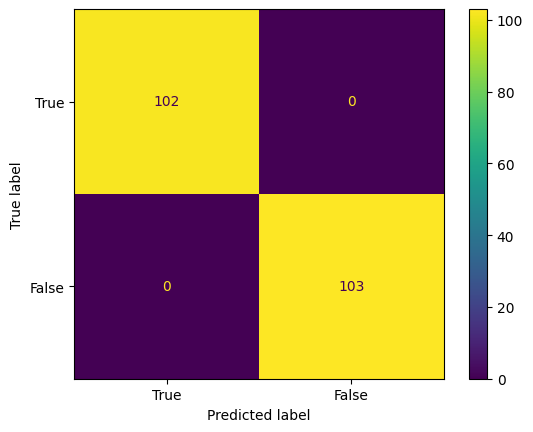

In [ ]:
cm_display= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[True, False])
cm_display.plot()
plt.show()